<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/BertModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.3 MB/s eta 0:00:00


In [1]:
!pip install transformers pandas torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AIEngineer/data.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,subject,description,ticket_type,clean_subject,clean_description,tokenized_subject,tokenized_description,meaning_subject,meaning_description
0,Interlink : MA วันที่ 15 กรกฎาคม 2565 เวลา 00....,"From: ""NQM Interlink Telecom"" <nqm@interlinkte...",Request,ma น น cid inextbaac สาขา หน่วยบ...,เรื่อง ขอกำหนดการปรับปรุงการให้บริการ บริษัท ไ...,"['ma', 'น', 'น', 'cid', 'inextbaac', 'สาขา', '...","['เรื่อง', 'ขอ', 'กำหนด', 'การปรับปรุง', 'การ'...","['inextbaac', 'cid', 'สาขา', 'หน่วยบุรีรัมย์',...","['ท่าน', 'สิ้นสุดดำเนินการ', 'ปรับปรุง', 'ขอจั..."
1,[Closed]Promessy Corporation : แจ้งตรวจสอบเครื...,From: Werachat Nawaroongruang <werachat.nawaro...,Request,promessy corporation ตรวจสอบเครื่อง ip r...,inet team เครื่อง private ip ได้มีการ rest...,"['promessy', 'corporation', 'ตรวจสอบ', 'เครื่อ...","['inet', 'team', 'เครื่อง', 'private', 'ip', '...","['ip', 'restart', 'ตรวจสอบเครื่อง', 'โดยไม่ทรา...","['team', 'ได้มีการ', 'รบกวนเช็คให้หน่อยครับ', ..."
2,BAAC : รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสาร...,รับสายลูกค้าคุณสุริยา เบอร์ 0818863505 แจ้งมีต...,Request,รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสารภี เนื่...,รับสายลูกค้าคุณสุริยา เบอร์ มีตัวกล่องอุปกรณ์...,"['รบกวน', 'เข้าไป', 'เก็บตัว', 'กล่อง', 'สัญญา...","['รับสาย', 'ลูกค้า', 'คุณ', 'สุริยา', 'เบอร์',...","['เข้าไป', 'สารภี', 'เนื่องจากมีการย้ายอาคารไป...","['เข้าไป', 'เดิม', 'โทร', 'เพชร', 'ตัว', 'สุภา..."
3,Transform You : แจ้งขอข้อมูล Lun ดังนี้ Offsit...,"From: ""Teerayut Saowamok"" <teerayut.sa@transfo...",Request,ขอข้อมูล lun ดังนี้ offsite อยู่ที่ idc ไหนและ...,noc รบกวนเปิดเคสประสานงานทีม op cloud ทางทีม t...,"['ขอ', 'ข้อมูล', 'lun', 'ดังนี้', 'offsite', '...","['noc', 'รบกวน', 'เปิด', 'เคส', 'ประสานงาน', '...","['ดังนี้', 'full', 'อยู่ที่', 'ไหนและ', 'offsi...","['full', 'aci', 'เคส', 'sas', 'op', 'offsite',..."
4,GSB[SD] : แบบคำขอเปลี่ยนแปลงทรัพยากรบน GSB Clo...,From: Servicedesk <servicedesk@inetms.co.th>\n...,Request,แบบคำขอเปลี่ยนแปลงทรัพยากรบน gsb cloud based s...,noc ครับ subject internal gsb sr รับ ร...,"['แบบ', 'คำขอ', 'เปลี่ยนแปลง', 'ทรัพยากร', 'บน...","['noc', 'ครับ', 'subject', 'internal', 'gsb', ...","['แบบคำขอเปลี่ยนแปลงทรัพยากรบน', 'กรมการปกครอง...","['อายุการใช้งาน', 'ทรัพยากร', 'gsb', 'gateway'..."


In [5]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.nn as nn
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

In [6]:
device = torch.device("cuda")

In [7]:
df['sentence'] = df['clean_subject'] + ' ' + df['clean_description']
df['sentence'].loc[0]

'ma     น      น   cid  inextbaac   สาขา หน่วยบุรีรัมย์ เรื่อง ขอกำหนดการปรับปรุงการให้บริการ บริษัท ไอเน็กซ์ บรอดแบนด์ จำกัด ขอจัดส่งจดหมายปรับปรุงการบริการวงจร จำนวน  วงจร วัตถุประ์การดำเนินการ   ปรับปรุงบริการโครงข่าย เนื่องจากจะดำเนินการ replace อุปกรณ์ภายใน node พื้นที่ดำเนินการ   node บุรีรัมย์ site interlink วัน เริ่มดำเนินการ       น  วัน สิ้นสุดดำเนินการ       น  ระยะกระทบ   กระทบบริการไม่เกิน   ชั่วโมง รายละเอียดทั้งหมดตาม เอกสารแนบมา จึงมาโปรดทราบความจำเป็นดังกล่าว และบริษัทฯ ขออภัยในความไม่สะดวกในครั้งนี้ หากท่านมีข้อสงสัยหรือต้องการข้อมูลเพิ่มเติม โปรดติดต่อตามหมายเลขด้านล่าง หรือ reply mail กลับมาที่'

In [8]:
data = df[['ticket_type','sentence']]
data.head(5)

,ticket_type,sentence
0,Request,ma น น cid inextbaac สาขา หน่วยบ...
1,Request,promessy corporation ตรวจสอบเครื่อง ip r...
2,Request,รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสารภี เนื่...
3,Request,ขอข้อมูล lun ดังนี้ offsite อยู่ที่ idc ไหนและ...
4,Request,แบบคำขอเปลี่ยนแปลงทรัพยากรบน gsb cloud based s...


In [56]:
data = data[data['ticket_type'] != 'Problem'] #Drop Class Problem

In [57]:
data.dropna(subset=['sentence'], inplace=True)

In [58]:
# check class distribution
data['ticket_type'].value_counts(normalize = True)

ticket_type
Request     0.584616
Incident    0.415384
Name: proportion, dtype: float64

In [59]:
data.isnull().sum()

ticket_type    0
sentence       0
dtype: int64

In [60]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['sentence'], data['ticket_type'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['ticket_type'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.3,
                                                                stratify=temp_labels)

In [61]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

<Axes: >

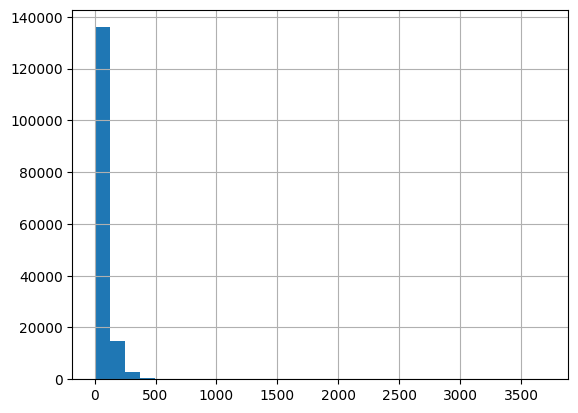

In [62]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [63]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
train_labels = le.fit_transform(train_labels)
val_labels = le.transform(val_labels)
test_labels = le.transform(test_labels)

In [65]:
import torch

# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels)

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels)

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels)

In [66]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Batch size
batch_size = 16

# Create TensorDataset for training data
train_data = TensorDataset(train_seq, train_mask, train_y)
# Create a RandomSampler for training data
train_sampler = RandomSampler(train_data)
# Create DataLoader for training data
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# (Optional) Create TensorDataset and DataLoader for test data if needed
# test_data = TensorDataset(test_seq, test_mask, test_y)
# test_sampler = SequentialSampler(test_data)
# test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


In [67]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [68]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)  # Adjusted for 2 classes (0 and 1)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_ids, attention_mask=None):
        # pass the inputs to the model
        outputs = self.bert(input_ids, attention_mask=attention_mask)

        # extract the last hidden state (CLS token) from BERT output
        cls_hs = outputs.pooler_output

        # apply dropout
        x = self.dropout(cls_hs)

        # dense layer 1
        x = self.fc1(x)

        # apply relu activation
        x = self.relu(x)

        # apply dropout
        x = self.dropout(x)

        # dense layer 2 (output layer)
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x


In [69]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [70]:
np.unique(train_labels)

array([0, 1])

In [71]:
# optimizer from hugging face transformers
from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)


# Compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print('Class Weights:', class_weights)


Class Weights: [1.20371091 0.85525952]


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [72]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 5

In [27]:
import time

In [73]:
# Function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0

    # Empty list to save model predictions
    total_preds = []

    # Iterate over batches
    for step, batch in enumerate(train_dataloader):

        # Progress update after every 50 batches
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # Push the batch to GPU
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch

        # Clear previously calculated gradients
        optimizer.zero_grad()

        # Get model predictions for the current batch
        preds = model(sent_id, mask)

        # Compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # Add on to the total loss
        total_loss += loss.item()

        # Backward pass to calculate the gradients
        loss.backward()

        # Clip the gradients to 1.0 to prevent the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters
        optimizer.step()

        # Model predictions are stored on GPU, so push them to CPU
        preds = preds.detach().cpu().numpy()

        # Append the model predictions
        total_preds.append(preds)

    # Compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    # Predictions are in the form of (no. of batches, size of batch, no. of classes).
    # Reshape the predictions in the form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # Return the loss and predictions
    return avg_loss, total_preds

In [74]:
# Function for evaluating the model
def evaluate():
    print("\nEvaluating...")

    # Deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # Empty list to save the model predictions
    total_preds = []

    # Iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # Push the batch to GPU
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch

        # Deactivate autograd
        with torch.no_grad():

            # Model predictions
            preds = model(sent_id, mask)

            # Compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss += loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # Compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # Reshape the predictions in the form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [75]:
# Set initial loss to infinity
best_valid_loss = float('inf')

# Define the number of epochs
epochs = 1

# Empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# For each epoch
for epoch in range(epochs):

    print(f'\n Epoch {epoch + 1} / {epochs}')

    # Train the model
    train_loss, _ = train()

    # Evaluate the model
    valid_loss, _ = evaluate()

    # Save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # Append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 1
  Batch    50  of  9,663.
  Batch   100  of  9,663.
  Batch   150  of  9,663.
  Batch   200  of  9,663.
  Batch   250  of  9,663.
  Batch   300  of  9,663.
  Batch   350  of  9,663.
  Batch   400  of  9,663.
  Batch   450  of  9,663.
  Batch   500  of  9,663.
  Batch   550  of  9,663.
  Batch   600  of  9,663.
  Batch   650  of  9,663.
  Batch   700  of  9,663.
  Batch   750  of  9,663.
  Batch   800  of  9,663.
  Batch   850  of  9,663.
  Batch   900  of  9,663.
  Batch   950  of  9,663.
  Batch 1,000  of  9,663.
  Batch 1,050  of  9,663.
  Batch 1,100  of  9,663.
  Batch 1,150  of  9,663.
  Batch 1,200  of  9,663.
  Batch 1,250  of  9,663.
  Batch 1,300  of  9,663.
  Batch 1,350  of  9,663.
  Batch 1,400  of  9,663.
  Batch 1,450  of  9,663.
  Batch 1,500  of  9,663.
  Batch 1,550  of  9,663.
  Batch 1,600  of  9,663.
  Batch 1,650  of  9,663.
  Batch 1,700  of  9,663.
  Batch 1,750  of  9,663.
  Batch 1,800  of  9,663.
  Batch 1,850  of  9,663.
  Batch 1,900  of  9,663

In [76]:
# Define the path where the model weights will be saved
path = '/content/drive/MyDrive/AIEngineer/bert.pt'

# Save the model weights
torch.save(model.state_dict(), path)

print(f"Model weights saved successfully to '{path}'")

Model weights saved successfully to '/content/drive/MyDrive/AIEngineer/bert.pt'


## model performance

In [ ]:
batch_size = 8

# Initialize lists to store predictions
preds_list = []

# Iterate over batches of test data
for i in range(0, len(test_seq), batch_size):
    # Get batch tensors
    batch_seq = test_seq[i:i+batch_size].to(device)
    batch_mask = test_mask[i:i+batch_size].to(device)

    # Perform inference
    with torch.no_grad():
        batch_preds = model(batch_seq, batch_mask)
        batch_preds = batch_preds.detach().cpu().numpy()

    # Append batch predictions to list
    preds_list.append(batch_preds)

# Concatenate all batch predictions
preds = np.concatenate(preds_list, axis=0)

# Calculate final predictions
preds = np.argmax(preds, axis=1)

In [79]:
# Decode encoded labels to original labels
original_labels = le.inverse_transform(test_y)

# Convert original_labels to integers if they are strings
if isinstance(original_labels[0], str):
    original_labels = le.transform(original_labels)

# Print classification report with original labels
print(classification_report(original_labels, preds))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72      8257
           1       0.78      0.89      0.83     11620

    accuracy                           0.79     19877
   macro avg       0.79      0.77      0.78     19877
weighted avg       0.79      0.79      0.79     19877



## model interpret

In [86]:
# Example sentence to interpret
sentence = "Please check the IP address of the device."

# Tokenize the sentence
inputs = tokenizer(sentence, return_tensors="pt")
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

# Get model prediction
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs[0]  # Get logits from the model output
    preds = logits.argmax(dim=-1).cpu().numpy()  # Predictions based on argmax of logits


In [93]:
!pip install deepcut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00


In [100]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 37.3 MB/s eta 0:00:00


In [ ]:
state_dict = torch.load(path, map_location=torch.device('cpu'))
print(state_dict.keys())

In [101]:
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
from pythainlp.tokenize import word_tokenize

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Define the path where the model weights are saved
path = '/content/drive/MyDrive/AIEngineer/bert.pt'

# Load the saved model weights into the model
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

# Example query
query = 'สาขา หน่วยบุรีรัมย์ เรื่อง ขอกำหนดการปรับปรุงการให้บริการ บริษัท ไอเน็กซ์ บรอดแบนด์ จำกัด ขอจัดส่งจดหมายปรับปรุงการบริการวงจร จำนวน  วงจร วัตถุประการดำเนินการ'
query_text = ' '.join(word_tokenize(query, engine="newmm"))
query_dict = tokenizer(query_text, max_length=512, padding=True, truncation=True, return_tensors='pt')

# Perform model inference
with torch.no_grad():
    outputs = model(**query_dict)
    query_embedding = torch.mean(outputs.last_hidden_state, dim=1)  # Average pooling over tokens
    query_embedding = F.normalize(query_embedding, p=2, dim=1)

# Interpret the prediction
print("Query:", query)
print("BERT Embedding:", query_embedding)


RuntimeError: Error(s) in loading state_dict for BertModel:
	Missing key(s) in state_dict: "embeddings.word_embeddings.weight", "embeddings.position_embeddings.weight", "embeddings.token_type_embeddings.weight", "embeddings.LayerNorm.weight", "embeddings.LayerNorm.bias", "encoder.layer.0.attention.self.query.weight", "encoder.layer.0.attention.self.query.bias", "encoder.layer.0.attention.self.key.weight", "encoder.layer.0.attention.self.key.bias", "encoder.layer.0.attention.self.value.weight", "encoder.layer.0.attention.self.value.bias", "encoder.layer.0.attention.output.dense.weight", "encoder.layer.0.attention.output.dense.bias", "encoder.layer.0.attention.output.LayerNorm.weight", "encoder.layer.0.attention.output.LayerNorm.bias", "encoder.layer.0.intermediate.dense.weight", "encoder.layer.0.intermediate.dense.bias", "encoder.layer.0.output.dense.weight", "encoder.layer.0.output.dense.bias", "encoder.layer.0.output.LayerNorm.weight", "encoder.layer.0.output.LayerNorm.bias", "encoder.layer.1.attention.self.query.weight", "encoder.layer.1.attention.self.query.bias", "encoder.layer.1.attention.self.key.weight", "encoder.layer.1.attention.self.key.bias", "encoder.layer.1.attention.self.value.weight", "encoder.layer.1.attention.self.value.bias", "encoder.layer.1.attention.output.dense.weight", "encoder.layer.1.attention.output.dense.bias", "encoder.layer.1.attention.output.LayerNorm.weight", "encoder.layer.1.attention.output.LayerNorm.bias", "encoder.layer.1.intermediate.dense.weight", "encoder.layer.1.intermediate.dense.bias", "encoder.layer.1.output.dense.weight", "encoder.layer.1.output.dense.bias", "encoder.layer.1.output.LayerNorm.weight", "encoder.layer.1.output.LayerNorm.bias", "encoder.layer.2.attention.self.query.weight", "encoder.layer.2.attention.self.query.bias", "encoder.layer.2.attention.self.key.weight", "encoder.layer.2.attention.self.key.bias", "encoder.layer.2.attention.self.value.weight", "encoder.layer.2.attention.self.value.bias", "encoder.layer.2.attention.output.dense.weight", "encoder.layer.2.attention.output.dense.bias", "encoder.layer.2.attention.output.LayerNorm.weight", "encoder.layer.2.attention.output.LayerNorm.bias", "encoder.layer.2.intermediate.dense.weight", "encoder.layer.2.intermediate.dense.bias", "encoder.layer.2.output.dense.weight", "encoder.layer.2.output.dense.bias", "encoder.layer.2.output.LayerNorm.weight", "encoder.layer.2.output.LayerNorm.bias", "encoder.layer.3.attention.self.query.weight", "encoder.layer.3.attention.self.query.bias", "encoder.layer.3.attention.self.key.weight", "encoder.layer.3.attention.self.key.bias", "encoder.layer.3.attention.self.value.weight", "encoder.layer.3.attention.self.value.bias", "encoder.layer.3.attention.output.dense.weight", "encoder.layer.3.attention.output.dense.bias", "encoder.layer.3.attention.output.LayerNorm.weight", "encoder.layer.3.attention.output.LayerNorm.bias", "encoder.layer.3.intermediate.dense.weight", "encoder.layer.3.intermediate.dense.bias", "encoder.layer.3.output.dense.weight", "encoder.layer.3.output.dense.bias", "encoder.layer.3.output.LayerNorm.weight", "encoder.layer.3.output.LayerNorm.bias", "encoder.layer.4.attention.self.query.weight", "encoder.layer.4.attention.self.query.bias", "encoder.layer.4.attention.self.key.weight", "encoder.layer.4.attention.self.key.bias", "encoder.layer.4.attention.self.value.weight", "encoder.layer.4.attention.self.value.bias", "encoder.layer.4.attention.output.dense.weight", "encoder.layer.4.attention.output.dense.bias", "encoder.layer.4.attention.output.LayerNorm.weight", "encoder.layer.4.attention.output.LayerNorm.bias", "encoder.layer.4.intermediate.dense.weight", "encoder.layer.4.intermediate.dense.bias", "encoder.layer.4.output.dense.weight", "encoder.layer.4.output.dense.bias", "encoder.layer.4.output.LayerNorm.weight", "encoder.layer.4.output.LayerNorm.bias", "encoder.layer.5.attention.self.query.weight", "encoder.layer.5.attention.self.query.bias", "encoder.layer.5.attention.self.key.weight", "encoder.layer.5.attention.self.key.bias", "encoder.layer.5.attention.self.value.weight", "encoder.layer.5.attention.self.value.bias", "encoder.layer.5.attention.output.dense.weight", "encoder.layer.5.attention.output.dense.bias", "encoder.layer.5.attention.output.LayerNorm.weight", "encoder.layer.5.attention.output.LayerNorm.bias", "encoder.layer.5.intermediate.dense.weight", "encoder.layer.5.intermediate.dense.bias", "encoder.layer.5.output.dense.weight", "encoder.layer.5.output.dense.bias", "encoder.layer.5.output.LayerNorm.weight", "encoder.layer.5.output.LayerNorm.bias", "encoder.layer.6.attention.self.query.weight", "encoder.layer.6.attention.self.query.bias", "encoder.layer.6.attention.self.key.weight", "encoder.layer.6.attention.self.key.bias", "encoder.layer.6.attention.self.value.weight", "encoder.layer.6.attention.self.value.bias", "encoder.layer.6.attention.output.dense.weight", "encoder.layer.6.attention.output.dense.bias", "encoder.layer.6.attention.output.LayerNorm.weight", "encoder.layer.6.attention.output.LayerNorm.bias", "encoder.layer.6.intermediate.dense.weight", "encoder.layer.6.intermediate.dense.bias", "encoder.layer.6.output.dense.weight", "encoder.layer.6.output.dense.bias", "encoder.layer.6.output.LayerNorm.weight", "encoder.layer.6.output.LayerNorm.bias", "encoder.layer.7.attention.self.query.weight", "encoder.layer.7.attention.self.query.bias", "encoder.layer.7.attention.self.key.weight", "encoder.layer.7.attention.self.key.bias", "encoder.layer.7.attention.self.value.weight", "encoder.layer.7.attention.self.value.bias", "encoder.layer.7.attention.output.dense.weight", "encoder.layer.7.attention.output.dense.bias", "encoder.layer.7.attention.output.LayerNorm.weight", "encoder.layer.7.attention.output.LayerNorm.bias", "encoder.layer.7.intermediate.dense.weight", "encoder.layer.7.intermediate.dense.bias", "encoder.layer.7.output.dense.weight", "encoder.layer.7.output.dense.bias", "encoder.layer.7.output.LayerNorm.weight", "encoder.layer.7.output.LayerNorm.bias", "encoder.layer.8.attention.self.query.weight", "encoder.layer.8.attention.self.query.bias", "encoder.layer.8.attention.self.key.weight", "encoder.layer.8.attention.self.key.bias", "encoder.layer.8.attention.self.value.weight", "encoder.layer.8.attention.self.value.bias", "encoder.layer.8.attention.output.dense.weight", "encoder.layer.8.attention.output.dense.bias", "encoder.layer.8.attention.output.LayerNorm.weight", "encoder.layer.8.attention.output.LayerNorm.bias", "encoder.layer.8.intermediate.dense.weight", "encoder.layer.8.intermediate.dense.bias", "encoder.layer.8.output.dense.weight", "encoder.layer.8.output.dense.bias", "encoder.layer.8.output.LayerNorm.weight", "encoder.layer.8.output.LayerNorm.bias", "encoder.layer.9.attention.self.query.weight", "encoder.layer.9.attention.self.query.bias", "encoder.layer.9.attention.self.key.weight", "encoder.layer.9.attention.self.key.bias", "encoder.layer.9.attention.self.value.weight", "encoder.layer.9.attention.self.value.bias", "encoder.layer.9.attention.output.dense.weight", "encoder.layer.9.attention.output.dense.bias", "encoder.layer.9.attention.output.LayerNorm.weight", "encoder.layer.9.attention.output.LayerNorm.bias", "encoder.layer.9.intermediate.dense.weight", "encoder.layer.9.intermediate.dense.bias", "encoder.layer.9.output.dense.weight", "encoder.layer.9.output.dense.bias", "encoder.layer.9.output.LayerNorm.weight", "encoder.layer.9.output.LayerNorm.bias", "encoder.layer.10.attention.self.query.weight", "encoder.layer.10.attention.self.query.bias", "encoder.layer.10.attention.self.key.weight", "encoder.layer.10.attention.self.key.bias", "encoder.layer.10.attention.self.value.weight", "encoder.layer.10.attention.self.value.bias", "encoder.layer.10.attention.output.dense.weight", "encoder.layer.10.attention.output.dense.bias", "encoder.layer.10.attention.output.LayerNorm.weight", "encoder.layer.10.attention.output.LayerNorm.bias", "encoder.layer.10.intermediate.dense.weight", "encoder.layer.10.intermediate.dense.bias", "encoder.layer.10.output.dense.weight", "encoder.layer.10.output.dense.bias", "encoder.layer.10.output.LayerNorm.weight", "encoder.layer.10.output.LayerNorm.bias", "encoder.layer.11.attention.self.query.weight", "encoder.layer.11.attention.self.query.bias", "encoder.layer.11.attention.self.key.weight", "encoder.layer.11.attention.self.key.bias", "encoder.layer.11.attention.self.value.weight", "encoder.layer.11.attention.self.value.bias", "encoder.layer.11.attention.output.dense.weight", "encoder.layer.11.attention.output.dense.bias", "encoder.layer.11.attention.output.LayerNorm.weight", "encoder.layer.11.attention.output.LayerNorm.bias", "encoder.layer.11.intermediate.dense.weight", "encoder.layer.11.intermediate.dense.bias", "encoder.layer.11.output.dense.weight", "encoder.layer.11.output.dense.bias", "encoder.layer.11.output.LayerNorm.weight", "encoder.layer.11.output.LayerNorm.bias", "pooler.dense.weight", "pooler.dense.bias". 
	Unexpected key(s) in state_dict: "bert.embeddings.word_embeddings.weight", "bert.embeddings.position_embeddings.weight", "bert.embeddings.token_type_embeddings.weight", "bert.embeddings.LayerNorm.weight", "bert.embeddings.LayerNorm.bias", "bert.encoder.layer.0.attention.self.query.weight", "bert.encoder.layer.0.attention.self.query.bias", "bert.encoder.layer.0.attention.self.key.weight", "bert.encoder.layer.0.attention.self.key.bias", "bert.encoder.layer.0.attention.self.value.weight", "bert.encoder.layer.0.attention.self.value.bias", "bert.encoder.layer.0.attention.output.dense.weight", "bert.encoder.layer.0.attention.output.dense.bias", "bert.encoder.layer.0.attention.output.LayerNorm.weight", "bert.encoder.layer.0.attention.output.LayerNorm.bias", "bert.encoder.layer.0.intermediate.dense.weight", "bert.encoder.layer.0.intermediate.dense.bias", "bert.encoder.layer.0.output.dense.weight", "bert.encoder.layer.0.output.dense.bias", "bert.encoder.layer.0.output.LayerNorm.weight", "bert.encoder.layer.0.output.LayerNorm.bias", "bert.encoder.layer.1.attention.self.query.weight", "bert.encoder.layer.1.attention.self.query.bias", "bert.encoder.layer.1.attention.self.key.weight", "bert.encoder.layer.1.attention.self.key.bias", "bert.encoder.layer.1.attention.self.value.weight", "bert.encoder.layer.1.attention.self.value.bias", "bert.encoder.layer.1.attention.output.dense.weight", "bert.encoder.layer.1.attention.output.dense.bias", "bert.encoder.layer.1.attention.output.LayerNorm.weight", "bert.encoder.layer.1.attention.output.LayerNorm.bias", "bert.encoder.layer.1.intermediate.dense.weight", "bert.encoder.layer.1.intermediate.dense.bias", "bert.encoder.layer.1.output.dense.weight", "bert.encoder.layer.1.output.dense.bias", "bert.encoder.layer.1.output.LayerNorm.weight", "bert.encoder.layer.1.output.LayerNorm.bias", "bert.encoder.layer.2.attention.self.query.weight", "bert.encoder.layer.2.attention.self.query.bias", "bert.encoder.layer.2.attention.self.key.weight", "bert.encoder.layer.2.attention.self.key.bias", "bert.encoder.layer.2.attention.self.value.weight", "bert.encoder.layer.2.attention.self.value.bias", "bert.encoder.layer.2.attention.output.dense.weight", "bert.encoder.layer.2.attention.output.dense.bias", "bert.encoder.layer.2.attention.output.LayerNorm.weight", "bert.encoder.layer.2.attention.output.LayerNorm.bias", "bert.encoder.layer.2.intermediate.dense.weight", "bert.encoder.layer.2.intermediate.dense.bias", "bert.encoder.layer.2.output.dense.weight", "bert.encoder.layer.2.output.dense.bias", "bert.encoder.layer.2.output.LayerNorm.weight", "bert.encoder.layer.2.output.LayerNorm.bias", "bert.encoder.layer.3.attention.self.query.weight", "bert.encoder.layer.3.attention.self.query.bias", "bert.encoder.layer.3.attention.self.key.weight", "bert.encoder.layer.3.attention.self.key.bias", "bert.encoder.layer.3.attention.self.value.weight", "bert.encoder.layer.3.attention.self.value.bias", "bert.encoder.layer.3.attention.output.dense.weight", "bert.encoder.layer.3.attention.output.dense.bias", "bert.encoder.layer.3.attention.output.LayerNorm.weight", "bert.encoder.layer.3.attention.output.LayerNorm.bias", "bert.encoder.layer.3.intermediate.dense.weight", "bert.encoder.layer.3.intermediate.dense.bias", "bert.encoder.layer.3.output.dense.weight", "bert.encoder.layer.3.output.dense.bias", "bert.encoder.layer.3.output.LayerNorm.weight", "bert.encoder.layer.3.output.LayerNorm.bias", "bert.encoder.layer.4.attention.self.query.weight", "bert.encoder.layer.4.attention.self.query.bias", "bert.encoder.layer.4.attention.self.key.weight", "bert.encoder.layer.4.attention.self.key.bias", "bert.encoder.layer.4.attention.self.value.weight", "bert.encoder.layer.4.attention.self.value.bias", "bert.encoder.layer.4.attention.output.dense.weight", "bert.encoder.layer.4.attention.output.dense.bias", "bert.encoder.layer.4.attention.output.LayerNorm.weight", "bert.encoder.layer.4.attention.output.LayerNorm.bias", "bert.encoder.layer.4.intermediate.dense.weight", "bert.encoder.layer.4.intermediate.dense.bias", "bert.encoder.layer.4.output.dense.weight", "bert.encoder.layer.4.output.dense.bias", "bert.encoder.layer.4.output.LayerNorm.weight", "bert.encoder.layer.4.output.LayerNorm.bias", "bert.encoder.layer.5.attention.self.query.weight", "bert.encoder.layer.5.attention.self.query.bias", "bert.encoder.layer.5.attention.self.key.weight", "bert.encoder.layer.5.attention.self.key.bias", "bert.encoder.layer.5.attention.self.value.weight", "bert.encoder.layer.5.attention.self.value.bias", "bert.encoder.layer.5.attention.output.dense.weight", "bert.encoder.layer.5.attention.output.dense.bias", "bert.encoder.layer.5.attention.output.LayerNorm.weight", "bert.encoder.layer.5.attention.output.LayerNorm.bias", "bert.encoder.layer.5.intermediate.dense.weight", "bert.encoder.layer.5.intermediate.dense.bias", "bert.encoder.layer.5.output.dense.weight", "bert.encoder.layer.5.output.dense.bias", "bert.encoder.layer.5.output.LayerNorm.weight", "bert.encoder.layer.5.output.LayerNorm.bias", "bert.encoder.layer.6.attention.self.query.weight", "bert.encoder.layer.6.attention.self.query.bias", "bert.encoder.layer.6.attention.self.key.weight", "bert.encoder.layer.6.attention.self.key.bias", "bert.encoder.layer.6.attention.self.value.weight", "bert.encoder.layer.6.attention.self.value.bias", "bert.encoder.layer.6.attention.output.dense.weight", "bert.encoder.layer.6.attention.output.dense.bias", "bert.encoder.layer.6.attention.output.LayerNorm.weight", "bert.encoder.layer.6.attention.output.LayerNorm.bias", "bert.encoder.layer.6.intermediate.dense.weight", "bert.encoder.layer.6.intermediate.dense.bias", "bert.encoder.layer.6.output.dense.weight", "bert.encoder.layer.6.output.dense.bias", "bert.encoder.layer.6.output.LayerNorm.weight", "bert.encoder.layer.6.output.LayerNorm.bias", "bert.encoder.layer.7.attention.self.query.weight", "bert.encoder.layer.7.attention.self.query.bias", "bert.encoder.layer.7.attention.self.key.weight", "bert.encoder.layer.7.attention.self.key.bias", "bert.encoder.layer.7.attention.self.value.weight", "bert.encoder.layer.7.attention.self.value.bias", "bert.encoder.layer.7.attention.output.dense.weight", "bert.encoder.layer.7.attention.output.dense.bias", "bert.encoder.layer.7.attention.output.LayerNorm.weight", "bert.encoder.layer.7.attention.output.LayerNorm.bias", "bert.encoder.layer.7.intermediate.dense.weight", "bert.encoder.layer.7.intermediate.dense.bias", "bert.encoder.layer.7.output.dense.weight", "bert.encoder.layer.7.output.dense.bias", "bert.encoder.layer.7.output.LayerNorm.weight", "bert.encoder.layer.7.output.LayerNorm.bias", "bert.encoder.layer.8.attention.self.query.weight", "bert.encoder.layer.8.attention.self.query.bias", "bert.encoder.layer.8.attention.self.key.weight", "bert.encoder.layer.8.attention.self.key.bias", "bert.encoder.layer.8.attention.self.value.weight", "bert.encoder.layer.8.attention.self.value.bias", "bert.encoder.layer.8.attention.output.dense.weight", "bert.encoder.layer.8.attention.output.dense.bias", "bert.encoder.layer.8.attention.output.LayerNorm.weight", "bert.encoder.layer.8.attention.output.LayerNorm.bias", "bert.encoder.layer.8.intermediate.dense.weight", "bert.encoder.layer.8.intermediate.dense.bias", "bert.encoder.layer.8.output.dense.weight", "bert.encoder.layer.8.output.dense.bias", "bert.encoder.layer.8.output.LayerNorm.weight", "bert.encoder.layer.8.output.LayerNorm.bias", "bert.encoder.layer.9.attention.self.query.weight", "bert.encoder.layer.9.attention.self.query.bias", "bert.encoder.layer.9.attention.self.key.weight", "bert.encoder.layer.9.attention.self.key.bias", "bert.encoder.layer.9.attention.self.value.weight", "bert.encoder.layer.9.attention.self.value.bias", "bert.encoder.layer.9.attention.output.dense.weight", "bert.encoder.layer.9.attention.output.dense.bias", "bert.encoder.layer.9.attention.output.LayerNorm.weight", "bert.encoder.layer.9.attention.output.LayerNorm.bias", "bert.encoder.layer.9.intermediate.dense.weight", "bert.encoder.layer.9.intermediate.dense.bias", "bert.encoder.layer.9.output.dense.weight", "bert.encoder.layer.9.output.dense.bias", "bert.encoder.layer.9.output.LayerNorm.weight", "bert.encoder.layer.9.output.LayerNorm.bias", "bert.encoder.layer.10.attention.self.query.weight", "bert.encoder.layer.10.attention.self.query.bias", "bert.encoder.layer.10.attention.self.key.weight", "bert.encoder.layer.10.attention.self.key.bias", "bert.encoder.layer.10.attention.self.value.weight", "bert.encoder.layer.10.attention.self.value.bias", "bert.encoder.layer.10.attention.output.dense.weight", "bert.encoder.layer.10.attention.output.dense.bias", "bert.encoder.layer.10.attention.output.LayerNorm.weight", "bert.encoder.layer.10.attention.output.LayerNorm.bias", "bert.encoder.layer.10.intermediate.dense.weight", "bert.encoder.layer.10.intermediate.dense.bias", "bert.encoder.layer.10.output.dense.weight", "bert.encoder.layer.10.output.dense.bias", "bert.encoder.layer.10.output.LayerNorm.weight", "bert.encoder.layer.10.output.LayerNorm.bias", "bert.encoder.layer.11.attention.self.query.weight", "bert.encoder.layer.11.attention.self.query.bias", "bert.encoder.layer.11.attention.self.key.weight", "bert.encoder.layer.11.attention.self.key.bias", "bert.encoder.layer.11.attention.self.value.weight", "bert.encoder.layer.11.attention.self.value.bias", "bert.encoder.layer.11.attention.output.dense.weight", "bert.encoder.layer.11.attention.output.dense.bias", "bert.encoder.layer.11.attention.output.LayerNorm.weight", "bert.encoder.layer.11.attention.output.LayerNorm.bias", "bert.encoder.layer.11.intermediate.dense.weight", "bert.encoder.layer.11.intermediate.dense.bias", "bert.encoder.layer.11.output.dense.weight", "bert.encoder.layer.11.output.dense.bias", "bert.encoder.layer.11.output.LayerNorm.weight", "bert.encoder.layer.11.output.LayerNorm.bias", "bert.pooler.dense.weight", "bert.pooler.dense.bias", "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias". 